### Laboratoria 2

Catedrático: Ing. Preng Biba Solares

Auxiliar: Ing. Jorge Alberto Osoy Barrera

Alumno: Felipe Carlos Escoto Castro


In [129]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


### Problema #1

#### Creamos la funcion

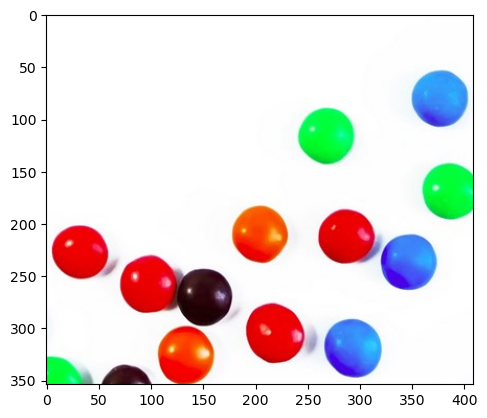

In [130]:
img = cv2.imread("pelotas.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()


In [131]:
def binarizar_imagen(img, umbral=127):

    
    if len(img.shape) == 3:  
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    
    _, imagen_binarizada = cv2.threshold(img, umbral, 255, cv2.THRESH_BINARY)
    
    return imagen_binarizada


In [132]:
imagen_binarizada = binarizar_imagen(img, umbral=150)

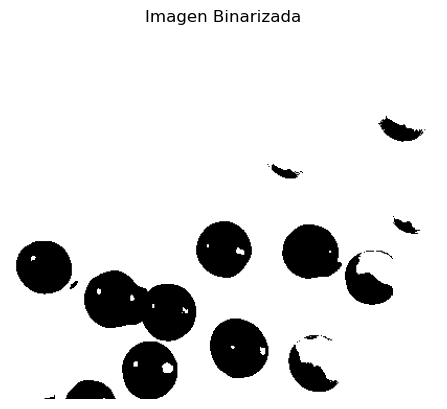

In [133]:
plt.imshow(imagen_binarizada, cmap='gray')
plt.title('Imagen Binarizada')
plt.axis('off') 
plt.show()

### Problema #2:

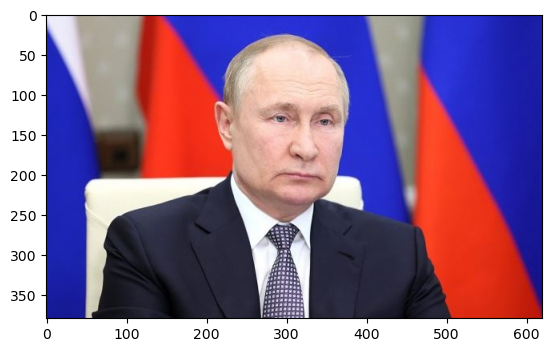

In [134]:
img1 = cv2.imread("vladimir.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.imshow(img1)
plt.show()

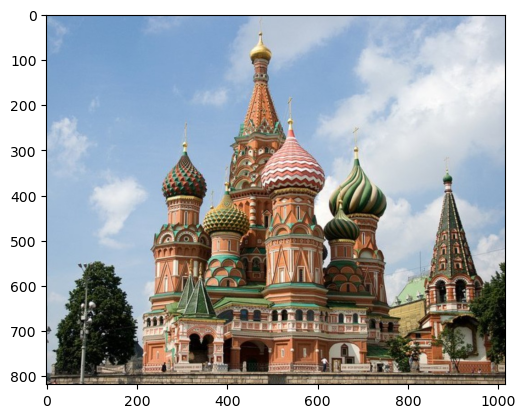

In [135]:
img2 = cv2.imread("Basilica.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img2)
plt.show()

In [136]:
def operaciones_imagenes(img1, img2, umbral=127):
  
    
    if img1.shape != img2.shape:
        img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    
    _, img1_bin = cv2.threshold(img1_gray, umbral, 255, cv2.THRESH_BINARY)
    _, img2_bin = cv2.threshold(img2_gray, umbral, 255, cv2.THRESH_BINARY)

    
    suma = cv2.add(img1_bin, img2_bin)
    resta = cv2.subtract(img1_bin, img2_bin)

    
    and_op = cv2.bitwise_and(img1_bin, img2_bin)
    or_op = cv2.bitwise_or(img1_bin, img2_bin)
    xor_op = cv2.bitwise_xor(img1_bin, img2_bin)

    
    resultados = {
        "suma": suma,
        "resta": resta,
        "and": and_op,
        "or": or_op,
        "xor": xor_op
    }

    return resultados


In [137]:
def mostrar_imagenes(imagenes, titulos):
  
    plt.figure(figsize=(12, 8))
    for i, (img, titulo) in enumerate(zip(imagenes, titulos)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(titulo)
        plt.axis('off')
    plt.show()

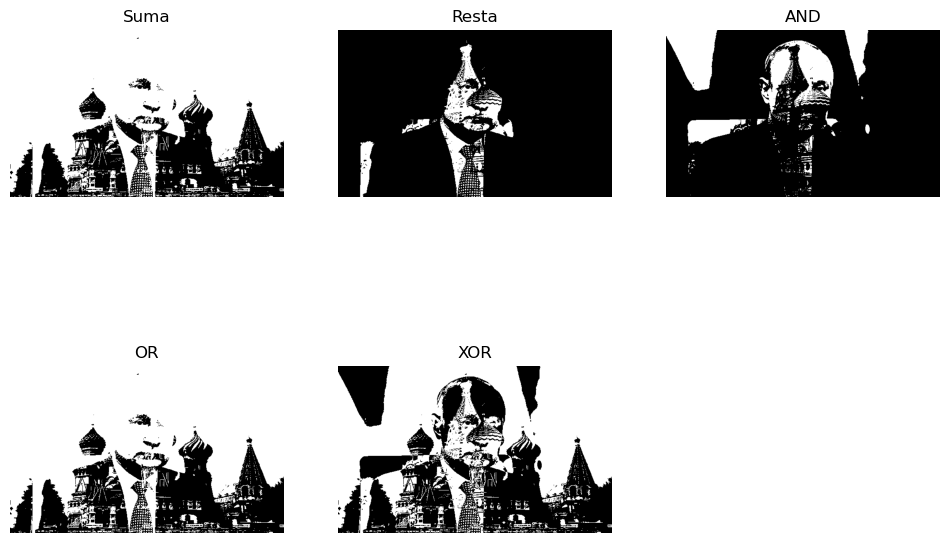

In [138]:
resultados = operaciones_imagenes(img1, img2, umbral=150)


imagenes = [
    resultados['suma'],
    resultados['resta'],
    resultados['and'],
    resultados['or'],
    resultados['xor']
]
titulos = ['Suma', 'Resta', 'AND', 'OR', 'XOR']


mostrar_imagenes(imagenes, titulos)

### Problema 3

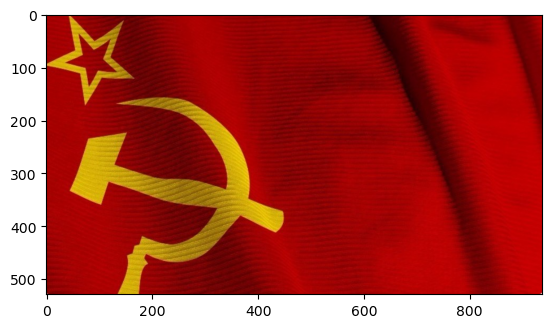

In [139]:
img3 = cv2.imread("oz y martillo.jpg")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

plt.imshow(img3)
plt.show()

In [140]:
def mostrar_imagen_3d(img):

   
    if len(img.shape) == 3:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        img_gray = img

    
    x = np.arange(0, img_gray.shape[1])
    y = np.arange(0, img_gray.shape[0])
    x, y = np.meshgrid(x, y)
    
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

   
    ax.plot_surface(x, y, img_gray, cmap='gray', edgecolor='none')

   
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensidad')

    
    plt.show()

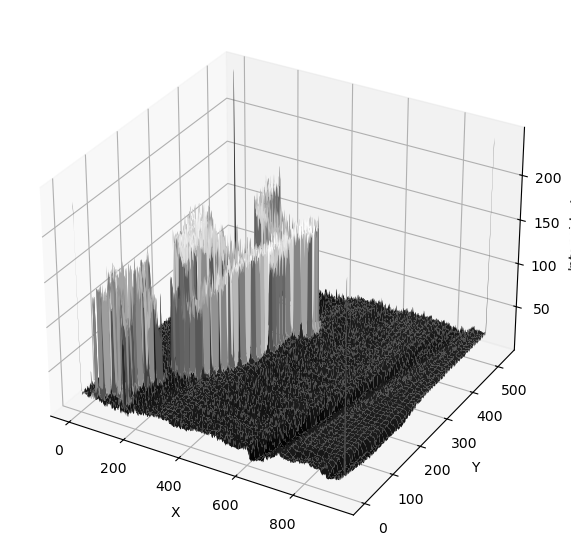

In [141]:
imagen3D = mostrar_imagen_3d(img3)

### Problema 4

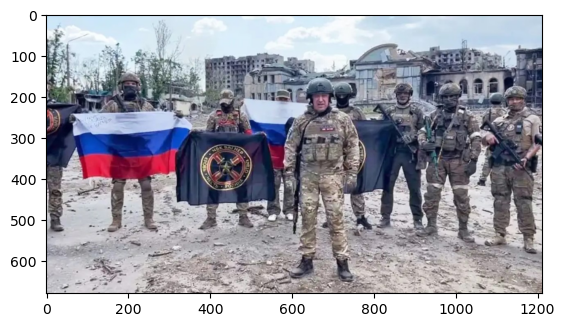

In [142]:
img4 = cv2.imread("bajmut.jpg")
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

plt.imshow(img4)
plt.show()

#### Convertimos a escala grises

In [143]:
def convertir_a_escala_de_grises(img):

    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
    return img

#### Transformacion negativa

In [144]:
def transformar_negativa(img):

    img = convertir_a_escala_de_grises(img)
    img_negativa = 255 - img
    
    return img_negativa

#### Transformacion lineal

In [145]:
def transformar_lineal(img, a=1.0, b=0.0):
  
    img = convertir_a_escala_de_grises(img)
    img_lineal = cv2.convertScaleAbs(img, alpha=a, beta=b)
    
    return img_lineal

#### Transformacion logaritmica

In [146]:
def transformar_logaritmica(img, c=1.0):

    img = convertir_a_escala_de_grises(img)
    img_normalizada = img / 255.0
    img_logaritmica = c * np.log1p(img_normalizada)
    img_logaritmica = np.uint8(255 * img_logaritmica / np.max(img_logaritmica))
    
    return img_logaritmica

Transformacion exponencial

In [147]:
def transformar_exponencial(img, c=1.0, b=1.0):

    img = convertir_a_escala_de_grises(img)
    img_normalizada = img / 255.0
    img_exponencial = c * (np.exp(b * img_normalizada) - 1)
    img_exponencial = np.uint8(255 * img_exponencial / np.max(img_exponencial))
    
    return img_exponencial

#### Mostramos imagenes 

In [148]:

def mostrar_imagenes(imagenes, titulos):
 
    plt.figure(figsize=(12, 8))
    for i, (img, titulo) in enumerate(zip(imagenes, titulos)):
        plt.subplot(2, 2, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(titulo)
        plt.axis('off')
    plt.show()


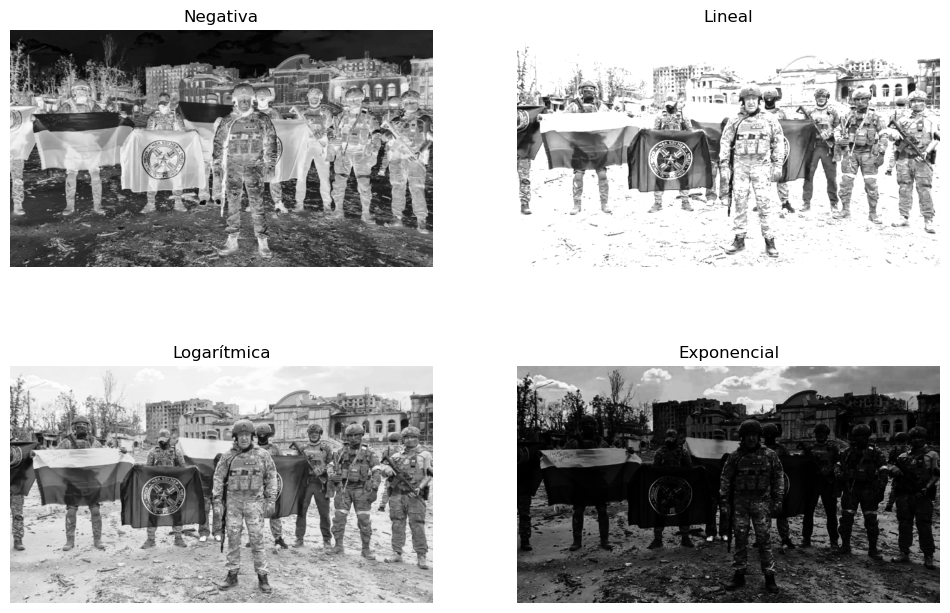

In [149]:

img_negativa = transformar_negativa(img4)
img_lineal = transformar_lineal(img4, a=1.5, b=50)
img_logaritmica = transformar_logaritmica(img4, c=1.0)
img_exponencial = transformar_exponencial(img4, c=1.0, b=5.0)


mostrar_imagenes([img_negativa, img_lineal, img_logaritmica, img_exponencial], 
                 ['Negativa', 'Lineal', 'Logarítmica', 'Exponencial'])

### Problema 5

Investigue que hace el kernel Laplaceano y como este enfoque se diferencia de usar el algoritmo de Canny para la detecci´on de bordes.

El kernel laplaciano y el algoritmo de Canny son dos técnicas diferentes para la detección de bordes en imágenes, cada una con sus propias características y aplicaciones.

#### Kernel Laplaciano

El kernel laplaciano es un operador utilizado en el procesamiento de imágenes para detectar bordes y áreas de transición abrupta en una imagen. El operador Laplaciano se basa en el concepto de la segunda derivada, que mide la curvatura de la función de intensidad de la imagen.

#### Funcionamiento

* 1. Segunda Derivada:

    El Laplaciano calcula la segunda derivada de la imagen, que resalta las áreas donde hay cambios bruscos en la intensidad.

* 2. Kernel:

    El kernel laplaciano es una máscara que se aplica a cada píxel de la imagen para calcular la segunda derivada. Un kernel común es el siguiente:
    
    [ 0  -1  0 ]
    [-1   4 -1 ]
    [ 0  -1  0 ]

    Este kernel se usa para detectar bordes en todas las direcciones.

* 3. Aplicación:

    La operación con el kernel laplaciano resalta los bordes y las áreas de transición en la imagen, produciendo una imagen en la que los bordes son más prominentes.

| **Ventajas**                                                                 | **Desventajas**                                                                                                   |
|--------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------|
| Simple y rápido de implementar.                                                | El Laplaciano puede ser sensible al ruido, ya que no incluye una fase de suavizado antes de la detección de bordes. |
| Útil para detectar bordes en imágenes con variaciones intensas.                |                                                                                                                  |






#### Ejemplo

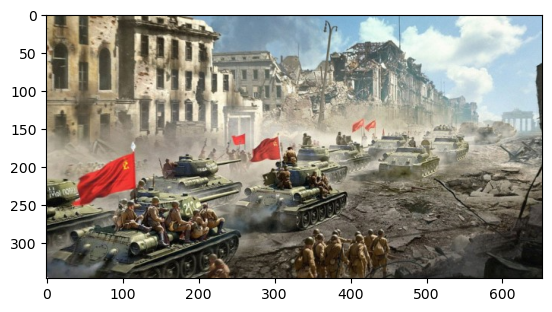

In [150]:
img5 = cv2.imread("soviet.jpg")
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

plt.imshow(img5)
plt.show()

In [ ]:
def aplicar_kernel_laplaciano(imagen):
    
    
    kernel_laplaciano = np.array([[ 0, -1,  0],
                                  [-1,  4, -1],
                                  [ 0, -1,  0]], dtype=np.float32)
    
    
    imagen_laplaciana = cv2.filter2D(imagen, -1, kernel_laplaciano)
    
    return imagen_laplaciana


imagen_laplaciana = aplicar_kernel_laplaciano(img5)


mostrar_imagenes([img5, imagen_laplaciana], ['Original', 'Laplaciana'])

In [ ]:
def mostrar_imagenes(imagenes, titulos):
 
    plt.figure(figsize=(10, 8))
    for i, (img, titulo) in enumerate(zip(imagenes, titulos)):
        plt.subplot(1, len(imagenes), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(titulo)
        plt.axis('off')
    plt.show()

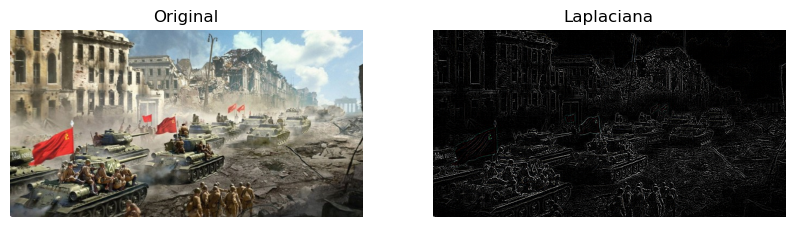

In [152]:

imagen_laplaciana = aplicar_kernel_laplaciano(img5)


mostrar_imagenes([img5, imagen_laplaciana], ['Original', 'Laplaciana'])

#### Algoritmo de Canny

El algoritmo de Canny es un método más avanzado y completo para la detección de bordes, que incluye varios pasos para mejorar la precisión y reducir el ruido.

#### Funcionamiento


* 1. Filtrado Gaussiano:

    Aplica un filtro Gaussiano para suavizar la imagen y reducir el ruido antes de detectar los bordes.

* 2. Gradiente de la Imagen:

    Calcula la magnitud y la dirección del gradiente utilizando operadores como Sobel. Esto ayuda a identificar las regiones de alto cambio en la intensidad.

* 3. Supresión de No Máximos:

    Realiza una supresión de no máximos para afinar los bordes detectados, eliminando los píxeles que no son los máximos locales en la dirección del gradiente.
    
* 4. Histeresis de Umbrales:

    Aplica un umbral alto y un umbral bajo para conectar los bordes y eliminar los bordes débiles que no están conectados a los bordes fuertes.

| **Ventajas**                                                                 | **Desventajas**                                                                                                   |
|--------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------|
| Menos sensible al ruido debido al suavizado previo.                            | Más complejo y computacionalmente costoso en comparación con el método de Laplaciano.                            |
| Proporciona bordes más finos y precisos gracias a la supresión de no máximos y la histeresis de umbrales. | Requiere la selección de umbrales, que puede ser sensible a los parámetros elegidos.                              |


#### Comparacion del kernel Laplaciano y el algoritmo de Canny

| Aspecto                   | Kernel Laplaciano                             | Algoritmo de Canny                           |
|---------------------------|-----------------------------------------------|---------------------------------------------|
| **Descripción**           | Detecta bordes mediante la segunda derivada. | Detecta bordes utilizando un proceso de varios pasos. |
| **Método Principal**      | Aplica un kernel para calcular la segunda derivada. | Suaviza la imagen, calcula gradientes, suprime no máximos y usa histeresis. |
| **Kernel Ejemplo**        | `[ 0  -1  0 ] [-1   4 -1 ] [ 0  -1  0 ]`     | No usa un único kernel; combina varios filtros y técnicas. |
| **Procesamiento de Imagen** | Directo, no realiza preprocesamiento.        | Suaviza la imagen antes de aplicar la detección de bordes. |
| **Precisión**             | Menos preciso, puede ser sensible al ruido.   | Más preciso, produce bordes finos y limpios. |
| **Sensible al Ruido**     | Sí, debido a la falta de suavizado.           | Menos sensible gracias al suavizado previo. |
| **Complejidad**           | Baja, fácil de implementar.                   | Alta, más complejo y computacionalmente costoso. |
| **Requisitos de Parámetros** | No requiere parámetros adicionales.          | Requiere ajustes de parámetros como umbrales y filtros Gaussianos. |
| **Resultado**             | Bordes resaltados con posibles bordes falsos. | Bordes definidos claramente, menos ruido y bordes más precisos. |



Ejemplo 

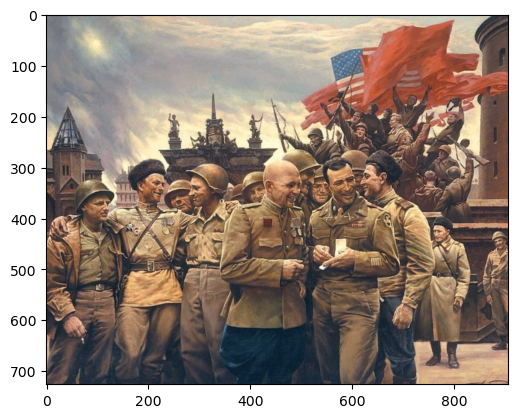

In [156]:
img6 = cv2.imread("victoria.jpg")
img6 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)

plt.imshow(img6)
plt.show()

In [158]:
def aplicar_algoritmo_canny(imagen, umbral1, umbral2):
 
    imagen_canny = cv2.Canny(imagen, umbral1, umbral2)
    
    return imagen_canny

In [159]:
def mostrar_imagenes(imagenes, titulos):
  
    plt.figure(figsize=(10, 8))
    for i, (img, titulo) in enumerate(zip(imagenes, titulos)):
        plt.subplot(1, len(imagenes), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(titulo)
        plt.axis('off')
    plt.show()

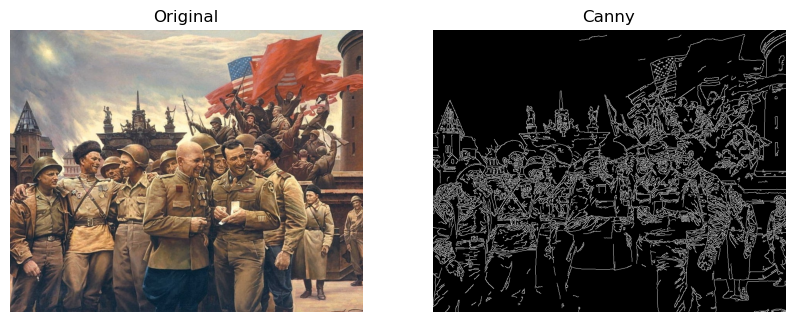

In [160]:
imagen_canny = aplicar_algoritmo_canny(img6, 100, 200)

# Mostrar la imagen original y la imagen con el algoritmo de Canny aplicado
mostrar_imagenes([img6, imagen_canny], ['Original', 'Canny'])

#### Bibliografia 

* 1. Wikipedia - Laplacian Operator:

    https://en.wikipedia.org/wiki/Laplacian_operator
    Explica el concepto del operador Laplaciano y su uso en procesamiento de imágenes.

* 2. Wikipedia - Canny Edge Detector:

    https://en.wikipedia.org/wiki/Canny_edge_detector
    Proporciona una descripción detallada del algoritmo de Canny para la detección de bordes.

* 3. OpenCV Documentation - Edge Detection:

    https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html
    Incluye ejemplos y descripciones sobre técnicas de detección de bordes, incluyendo el algoritmo de Canny.

* 4. Digital Image Processing Using MATLAB - Rafael C. Gonzalez & Richard E. Woods:

    https://www.mathworks.com/learn/tutorials/digital-image-processing.html
    Proporciona recursos y tutoriales sobre procesamiento de imágenes digitales, incluyendo la detección de bordes.